In [1]:
import talib as ta
import pandas as pd
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.sans-serif'] = ['SimHei']
import datetime as dt

### 1. 数据获取和数据处理

In [13]:
stock = ts.get_k_data('600030','2016-06-01','2017-06-30')

In [14]:
# 按照时间升序排序
stock.sort_index(inplace=True)

In [15]:
stock.head()

,date,open,close,high,low,volume,code
100,2016-06-01,15.584,15.380,15.723,15.371,1166959.0,600030
101,2016-06-02,15.380,15.408,15.510,15.241,771421.0,600030
102,2016-06-03,15.445,15.426,15.668,15.296,1154137.0,600030
103,2016-06-06,15.454,15.278,15.501,15.241,551761.0,600030
104,2016-06-07,15.324,15.306,15.445,15.250,594367.0,600030


In [16]:
stock['cci'] = ta.CCI(np.asarray(stock['high']),np.asarray(stock['low']),np.asarray(stock['close']),timeperiod=20)

In [17]:
stock.tail()

,date,open,close,high,low,volume,code,cci
358,2017-06-26,16.186,16.492,16.635,16.148,2113195.0,600030,230.595412
359,2017-06-27,16.482,16.349,16.511,16.301,924024.0,600030,172.265829
360,2017-06-28,16.320,16.330,16.502,16.253,871050.0,600030,135.393934
361,2017-06-29,16.320,16.330,16.425,16.224,668341.0,600030,107.889013
362,2017-06-30,16.263,16.263,16.349,16.072,751091.0,600030,73.801898


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26631 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 25351 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26631 missing from curr

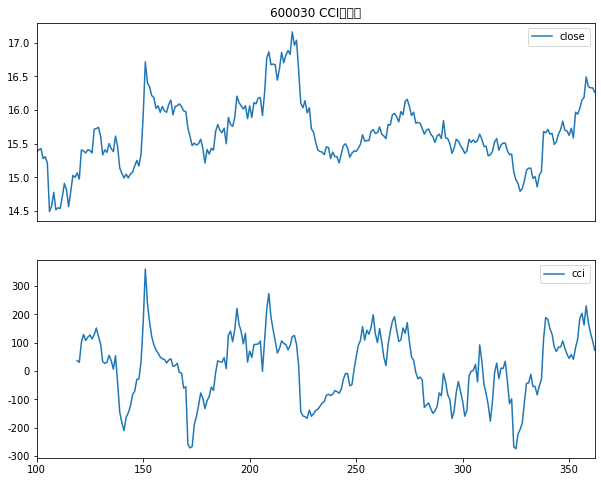

In [18]:
# 绘制图形
plt.subplot(2,1,1)
plt.title('600030 CCI指标图')
plt.gca().axes.get_xaxis().set_visible(False)
stock['close'].plot(figsize=(10,8))
plt.legend()
plt.subplot(2,1,2)
stock['cci'].plot(figsize=(10,8))
plt.legend()
plt.show()

### 交易信号，持仓信号和策略逻辑

In [19]:
stock['yes_cci'] = stock['cci'].shift(1)  # 昨天
stock['daybeforeyes_cci'] = stock['cci'].shift(2) # 前天

In [20]:
# 产生开平仓信号
# 开多信号，当前二日cci小于-100，昨日cci大于-100则记为开多信号
stock['signal'] = np.where(np.logical_and(stock['daybeforeyes_cci'] < -100,stock['yes_cci']>-100),1,np.nan)

# 开空信号：当前二日cci 大于100，昨日cci小于100则记为开空信号
stock['signal'] = np.where(np.logical_and(stock['daybeforeyes_cci']>100,stock['yes_cci']<100),-1,stock['signal'])
stock['signal'] = stock['signal'].fillna(method='ffill')
stock['signal'] = stock['signal'].fillna(0)

In [22]:
stock.tail()

,date,open,close,high,low,volume,code,cci,yes_cci,daybeforeyes_cci,signal
358,2017-06-26,16.186,16.492,16.635,16.148,2113195.0,600030,230.595412,163.336361,204.395199,-1.0
359,2017-06-27,16.482,16.349,16.511,16.301,924024.0,600030,172.265829,230.595412,163.336361,-1.0
360,2017-06-28,16.320,16.330,16.502,16.253,871050.0,600030,135.393934,172.265829,230.595412,-1.0
361,2017-06-29,16.320,16.330,16.425,16.224,668341.0,600030,107.889013,135.393934,172.265829,-1.0
362,2017-06-30,16.263,16.263,16.349,16.072,751091.0,600030,73.801898,107.889013,135.393934,-1.0


/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 24320 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 20179 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 

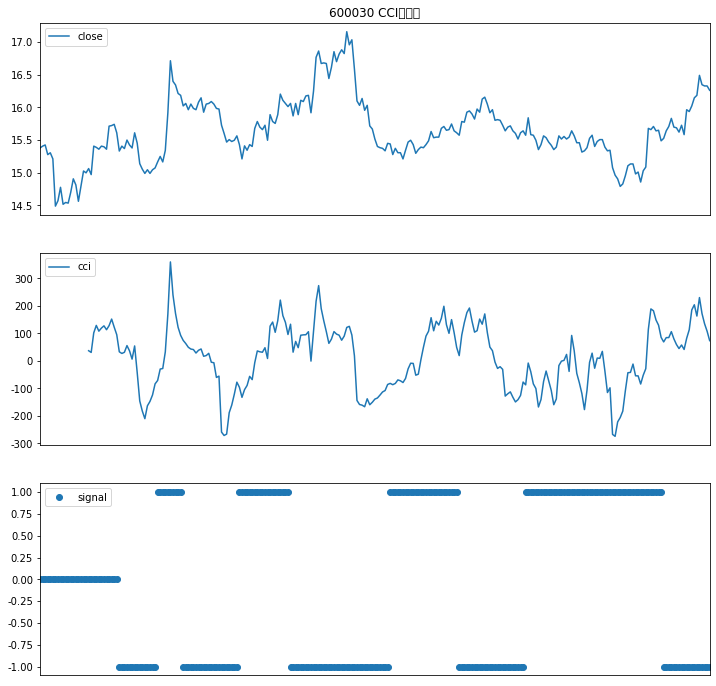

In [25]:
plt.subplot(3,1,1)
plt.title('600030 CCI开仓图')
plt.gca().axes.get_xaxis().set_visible(False)
stock['close'].plot(figsize=(12,12))
plt.legend(loc='upper left')

plt.subplot(3,1,2)
stock['cci'].plot(figsize=(12,12))
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,3)
stock['signal'].plot(figsize=(12,12),marker='o',linestyle='')
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)

plt.legend(loc='upper left')
plt.show()

### 持仓信号

In [26]:
# 如果当天没有交易信号，设置为nan，如果有，取原来信号
stock['signal'] = np.where(stock['signal'] == 0,np.nan,stock['signal'])

# 通过前向填充持仓信号
stock['position'] = stock['signal'].fillna(method='ffill')

/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 25345 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 20179 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 

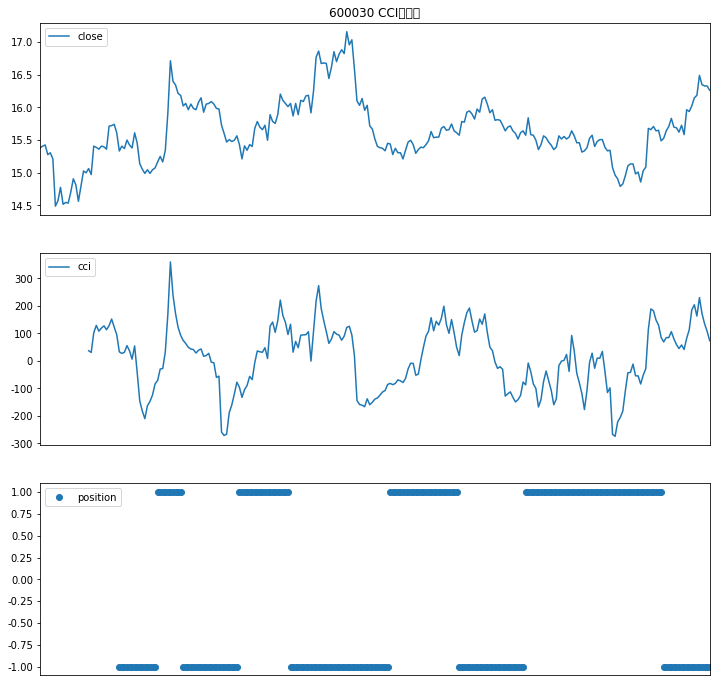

In [27]:
plt.subplot(3,1,1)
plt.title('600030 CCI持仓图')
plt.gca().axes.get_xaxis().set_visible(False)
stock['close'].plot(figsize=(12,12))
plt.legend(loc='upper left')

plt.subplot(3,1,2)
stock['cci'].plot(figsize=(12,12))
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,3)
stock['position'].plot(figsize=(12,12),marker='o',linestyle='')
plt.legend(loc='upper left')
plt.gca().axes.get_xaxis().set_visible(False)

plt.legend(loc='upper left')
plt.show()

In [42]:
### 收益计算和净值计算

# 计算股票的每日收益
stock['pct_change'] = stock['close'].pct_change()
# 计算策略的每日收益
stock['strategy_return'] = stock['pct_change'] * stock['signal']  # 不需要添加shift(1)
# 计算股票累计收益率
stock['return'] = (stock['pct_change']+1).cumprod()
# 计算策略累积收益率
stock['strategy_cum_return'] = (1+stock['strategy_return']).cumprod()
stock['strategy_cum_return'] = stock['strategy_cum_return'].fillna(method='ffill')

In [43]:
stock.head(100)

,date,open,close,high,low,volume,code,cci,yes_cci,daybeforeyes_cci,signal,position,pct_change,strategy_return,return,strategy_cum_return
100,2016-06-01,15.584,15.380,15.723,15.371,1166959.0,600030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,2016-06-02,15.380,15.408,15.510,15.241,771421.0,600030,NaN,NaN,NaN,NaN,NaN,0.001821,NaN,1.001821,NaN
102,2016-06-03,15.445,15.426,15.668,15.296,1154137.0,600030,NaN,NaN,NaN,NaN,NaN,0.001168,NaN,1.002991,NaN
103,2016-06-06,15.454,15.278,15.501,15.241,551761.0,600030,NaN,NaN,NaN,NaN,NaN,-0.009594,NaN,0.993368,NaN
104,2016-06-07,15.324,15.306,15.445,15.250,594367.0,600030,NaN,NaN,NaN,NaN,NaN,0.001833,NaN,0.995189,NaN
105,2016-06-08,15.296,15.213,15.343,15.139,548049.0,600030,NaN,NaN,NaN,NaN,NaN,-0.006076,NaN,0.989142,NaN
106,2016-06-13,15.036,14.489,15.083,14.433,931678.0,600030,NaN,NaN,NaN,NaN,NaN,-0.047591,NaN,0.942068,NaN
107,2016-06-14,14.461,14.572,14.656,14.368,542214.0,600030,NaN,NaN,NaN,NaN,NaN,0.005728,NaN,0.947464,NaN
108,2016-06-15,14.294,14.777,14.981,14.266,832329.0,600030,NaN,NaN,NaN,NaN,NaN,0.014068,NaN,0.960793,NaN
109,2016-06-16,14.665,14.517,14.721,14.442,626376.0,600030,NaN,NaN,NaN,NaN,NaN,-0.017595,NaN,0.943888,NaN


/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30410 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 30410 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sonny/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 

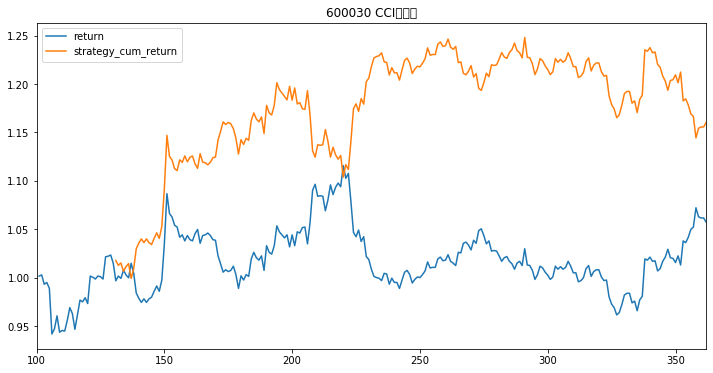

In [44]:
stock[['return','strategy_cum_return']].plot(figsize=(12,6))

plt.title('600030 CCI收益图')
plt.legend(loc='upper left')
plt.show()